### Proyecto 2 Entrega 3
### Sebastian Garcia 22291
### Jose Morales 22689

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from scipy.stats import linregress
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import *
import sklearn.metrics as metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV,Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


from scipy.stats import chi2_contingency
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Leer datos de un csv #

In [56]:
archivo1_csv = "train.csv"
datost = pd.read_csv(archivo1_csv, encoding='ISO-8859-1')

# - Analisis Exploratorio #

# Resumen del set de datos #

In [4]:
datost.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
datost.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
datost.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Descripción de Columnas #

1. **Id**: Id con el que está identificada la casa. <br>
2. **MSSubClass**: Tipo de construcción de la propiedad (subclase). <br>
3. **MSZoning**: Zona de uso de la propiedad (residencial, comercial, etc.). <br>
4. **LotFrontage**: Longitud en pies de trozo de calle conectado a la propiedad. <br>
5. **LotArea**: Tamaño del lote en pies cuadrados. <br>
6. **Street**: Tipo de calle donde se encuentra la propiedad. <br>
7. **Alley**: Acceso a la propiedad desde una calle secundaria o callejón. <br>
8. **LotShape**: Forma general de la propiedad. <br>
9. **LandContour**: Planicidad de la propiedad (si es plana, en pendiente, etc.). <br>
10. **Utilities**: Tipo de utilidades disponibles para la propiedad (agua, electricidad, gas, etc.). <br>
11. **LotConfig**: Configuración del lote (si es esquina, interior, etc.). <br>
12. **LandSlope**: Pendiente del terreno (suave, moderado o empinado). <br>
13. **Neighborhood**: Localización de la propiedad en relación con las vecindades cercanas. <br>
14. **Condition1**: Proximidad a una calle principal o carretera. <br>
15. **Condition2**: Proximidad a una segunda calle o carretera si aplica. <br>
16. **BldgType**: Tipo de construcción de la vivienda (casa independiente, adosada, etc.). <br>
17. **HouseStyle**: Estilo arquitectónico de la vivienda. <br>
18. **OverallQual**: Calidad general de los materiales y productos terminados en la construcción. <br>
19. **OverallCond**: Calificación general de la condición del lugar (nuevo, bien mantenido, deteriorado, etc.). <br>
20. **YearBuilt**: Año de construcción de la casa. <br>
21. **YearRemodAdd**: Año en el que se hizo alguna remodelación significativa de la casa. <br>
22. **RoofStyle**: Tipo de techo de la propiedad. <br>
23. **RoofMatl**: Material utilizado en el techo de la vivienda. <br>
24. **Exterior1st**: Primer tipo de revestimiento exterior de la casa. <br>
25. **Exterior2nd**: Segundo tipo de revestimiento exterior si aplica. <br>
26. **MasVnrType**: Tipo de revestimiento de mampostería (piedra, ladrillo, etc.). <br>
27. **MasVnrArea**: Área del revestimiento de mampostería en pies cuadrados. <br>
28. **ExterQual**: Calidad del material exterior de la propiedad. <br>
29. **ExterCond**: Condición del material exterior de la propiedad. <br>
30. **Foundation**: Tipo de cimientos de la casa (ladrillo, hormigón, etc.). <br>
31. **BsmtQual**: Calidad del sótano (si es completo, tiene alta, media o baja calidad). <br>
32. **BsmtCond**: Condición general del sótano. <br>
33. **BsmtExposure**: Si las paredes del sótano están expuestas o a nivel de jardín o salida. <br>
34. **BsmtFinType1**: Calidad del área terminada del sótano. <br>
35. **BsmtFinSF1**: Pies cuadrados del área terminada del sótano. <br>
36. **BsmtFinType2**: Calidad de la segunda área terminada del sótano, si aplica. <br>
37. **BsmtFinSF2**: Pies cuadrados del área terminada de la segunda zona del sótano. <br>
38. **BsmtUnfSF**: Pies cuadrados del sótano sin terminar. <br>
39. **TotalBsmtSF**: Pies cuadrados totales del sótano. <br>
40. **Heating**: Tipo de calefacción de la casa. <br>
41. **HeatingQC**: Calidad y condición del sistema de calefacción. <br>
42. **CentralAir**: Si la propiedad cuenta con aire acondicionado central. <br>
43. **Electrical**: Tipo de sistema eléctrico de la vivienda. <br>
44. **1stFlrSF**: Pies cuadrados del primer piso de la casa. <br>
45. **2ndFlrSF**: Pies cuadrados del segundo piso de la casa. <br>
46. **LowQualFinSF**: Pies cuadrados con acabados de baja calidad en todos los pisos. <br>
47. **GrLivArea**: Pies cuadrados de superficie habitable sobre el nivel del suelo. <br>
48. **BsmtFullBath**: Número de baños completos en el sótano. <br>
49. **BsmtHalfBath**: Número de baños a medio terminar en el sótano. <br>
50. **FullBath**: Número de baños completos fuera del sótano. <br>
51. **HalfBath**: Número de baños a medio terminar fuera del sótano. <br>
52. **BedroomAbvGr**: Número de dormitorios fuera del sótano. <br>
53. **KitchenAbvGr**: Número de cocinas fuera del sótano. <br>
54. **KitchenQual**: Calidad de la cocina. <br>
55. **TotRmsAbvGrd**: Número total de habitaciones fuera del sótano. <br>
56. **Functional**: Calificación de la funcionalidad de la casa (por ejemplo, si la distribución es adecuada). <br>
57. **Fireplaces**: Número de chimeneas en la propiedad. <br>
58. **FireplaceQu**: Calidad de las chimeneas. <br>
59. **GarageType**: Ubicación del garaje (integrado, separado, etc.). <br>
60. **GarageYrBlt**: Año en el que fue construido el garaje. <br>
61. **GarageFinish**: Acabado interior del garaje. <br>
62. **GarageCars**: Número de coches que el garaje puede albergar. <br>
63. **GarageArea**: Tamaño del garaje en pies cuadrados. <br>
64. **GarageQual**: Calidad del garaje. <br>
65. **GarageCond**: Condición del garaje. <br>
66. **PavedDrive**: Si la propiedad tiene un camino pavimentado. <br>
67. **WoodDeckSF**: Área cubierta de madera en pies cuadrados. <br>
68. **OpenPorchSF**: Área del porche abierto en pies cuadrados. <br>
69. **EnclosedPorch**: Área cerrada del porche en pies cuadrados. <br>
70. **3SsnPorch**: Área del porche de tres estaciones. <br>
71. **ScreenPorch**: Área del porche con malla o red en pies cuadrados. <br>
72. **PoolArea**: Área de la piscina en pies cuadrados. <br>
73. **PoolQC**: Calidad de la piscina. <br>
74. **Fence**: Calidad de la cerca de la propiedad. <br>
75. **MiscFeature**: Características no cubiertas en otras categorías (por ejemplo, ascensor, terraza, etc.). <br>
76. **MiscVal**: Valor de las características adicionales no cubiertas en otras categorías. <br>
77. **MoSold**: Mes en el que se vendió la propiedad. <br>
78. **YrSold**: Año en el que se vendió la propiedad. <br>
79. **SaleType**: Tipo de venta de la propiedad (por ejemplo, venta normal, subasta, etc.). <br>
80. **SaleCondition**: Condición de la venta (por ejemplo, si fue una venta de remate o en condiciones especiales). <br>
81. **SalePrice**: Precio de venta de la casa. <br>


In [7]:
datost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
datost.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
datost.duplicated().sum()

np.int64(0)

# Obtenemos las columnas con datos Numericos #

In [57]:
# Obtener los nombres de las columnas numericas
columnas_numericas = datost.select_dtypes(include=['number']).columns.tolist()
columnas_numericas.remove('Id')

# Obtener los nombres de las columnas no numéricas
columnas_no_numericas = datost.select_dtypes(exclude=['number']).columns.tolist()
print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas no numéricas:")
print(columnas_no_numericas)


numericast = datost[columnas_numericas]
#numericasp = datosp[columnas_numericas]



Columnas numéricas:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Columnas no numéricas:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

# Obtenemos las columnas numericas con datos faltantes #

In [58]:
def count_empty_values_per_column(df):
    total_rows = len(df)
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con valores faltantes
    
    if missing_values.empty:
        print("No hay valores faltantes en el DataFrame.")
    else:
        missing_percentage = (missing_values / total_rows) * 100
        missing_info = pd.DataFrame({
            'Valores Faltantes': missing_values,
            'Proporción (%)': missing_percentage
        })
        print("Número de valores faltantes por columna y su proporción respecto al total de filas:")
        print(missing_info)

#Columnas del df de train con filas vacias
count_empty_values_per_column(numericast)

Número de valores faltantes por columna y su proporción respecto al total de filas:
             Valores Faltantes  Proporción (%)
LotFrontage                259       17.739726
MasVnrArea                   8        0.547945
GarageYrBlt                 81        5.547945


In [12]:
#Columnas del df de test con filas vacias
#count_empty_values_per_column(numericasp)

Las variables que parecen podrian describir mejor el modelo son las variables GrLivArea y OverallQual por lo que se generaran modelos lineales con dichas variables

In [59]:
# Seleccionar las variables clave
columnas_numericas = ['SalePrice','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'
                      , 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                      , 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'
                      , 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
                      , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

datos_numericos = datost[columnas_numericas]  # Crear nuevo dataframe con las variables seleccionadas

# Mostrar las primeras filas para verificar
datos_numericos.head()



,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,181500,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,223500,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,140000,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,250000,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [60]:
columnas_no_numericas = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


letras = datost[columnas_no_numericas]
letras.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Vemos valores nulos o repetidos que tiene nuestro conjunto de datos y los sustituimos por la mediana.

In [61]:
print("Valores nulos por columna:")
print(datos_numericos.isnull().sum())

# Verificar valores duplicados
print("\nNúmero de filas duplicadas:")
print(datos_numericos.duplicated().sum())




Valores nulos por columna:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Número de filas duplicadas:
0


In [62]:
# Reemplazar valores nulos con la mediana de cada columna
# Para columnas numéricas, sustituimos los valores nulos por la mediana

datost.fillna({'LotFrontage' : datost['LotFrontage'].median()}, inplace=True)
datost.fillna({'GarageYrBlt' : datost['GarageYrBlt'].median()}, inplace=True)
#datost['GarageYrBlt'].fillna(datost['GarageYrBlt'].median(), inplace=True)
# Verificar nuevamente los valores nulos después de reemplazarlos
print("\nValores nulos después de reemplazar con la mediana:")
print(datos_numericos.isnull().sum())


Valores nulos después de reemplazar con la mediana:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64


In [63]:
print("Valores nulos por columna en datos categóricos:")
print(letras.isnull().sum())




Valores nulos por columna en datos categóricos:
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype:

In [64]:
datost.fillna({'Alley': datost['Alley'].mode()[0]}, inplace=True)
datost.fillna({'MasVnrType': datost['MasVnrType'].mode()[0]}, inplace=True)
datost.fillna({'BsmtQual': datost['BsmtQual'].mode()[0]}, inplace=True)
datost.fillna({'BsmtCond': datost['BsmtCond'].mode()[0]}, inplace=True)
datost.fillna({'BsmtExposure': datost['BsmtExposure'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType1': datost['BsmtFinType1'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType2': datost['BsmtFinType2'].mode()[0]}, inplace=True)
datost.fillna({'FireplaceQu': datost['FireplaceQu'].mode()[0]}, inplace=True)
datost.fillna({'GarageType': datost['GarageType'].mode()[0]}, inplace=True)
datost.fillna({'GarageFinish': datost['GarageFinish'].mode()[0]}, inplace=True)
datost.fillna({'GarageQual': datost['GarageQual'].mode()[0]}, inplace=True)
datost.fillna({'GarageCond': datost['GarageCond'].mode()[0]}, inplace=True)
datost.fillna({'PoolQC': datost['PoolQC'].mode()[0]}, inplace=True)
datost.fillna({'Fence': datost['Fence'].mode()[0]}, inplace=True)
datost.fillna({'MiscFeature': datost['MiscFeature'].mode()[0]}, inplace=True)



# Verificar nuevamente los valores nulos
print("\nValores nulos después de reemplazar con la moda:")
print(datost.isnull().sum())


Valores nulos después de reemplazar con la moda:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [19]:
datost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
datost.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

*Preprocesamiento del dataset*

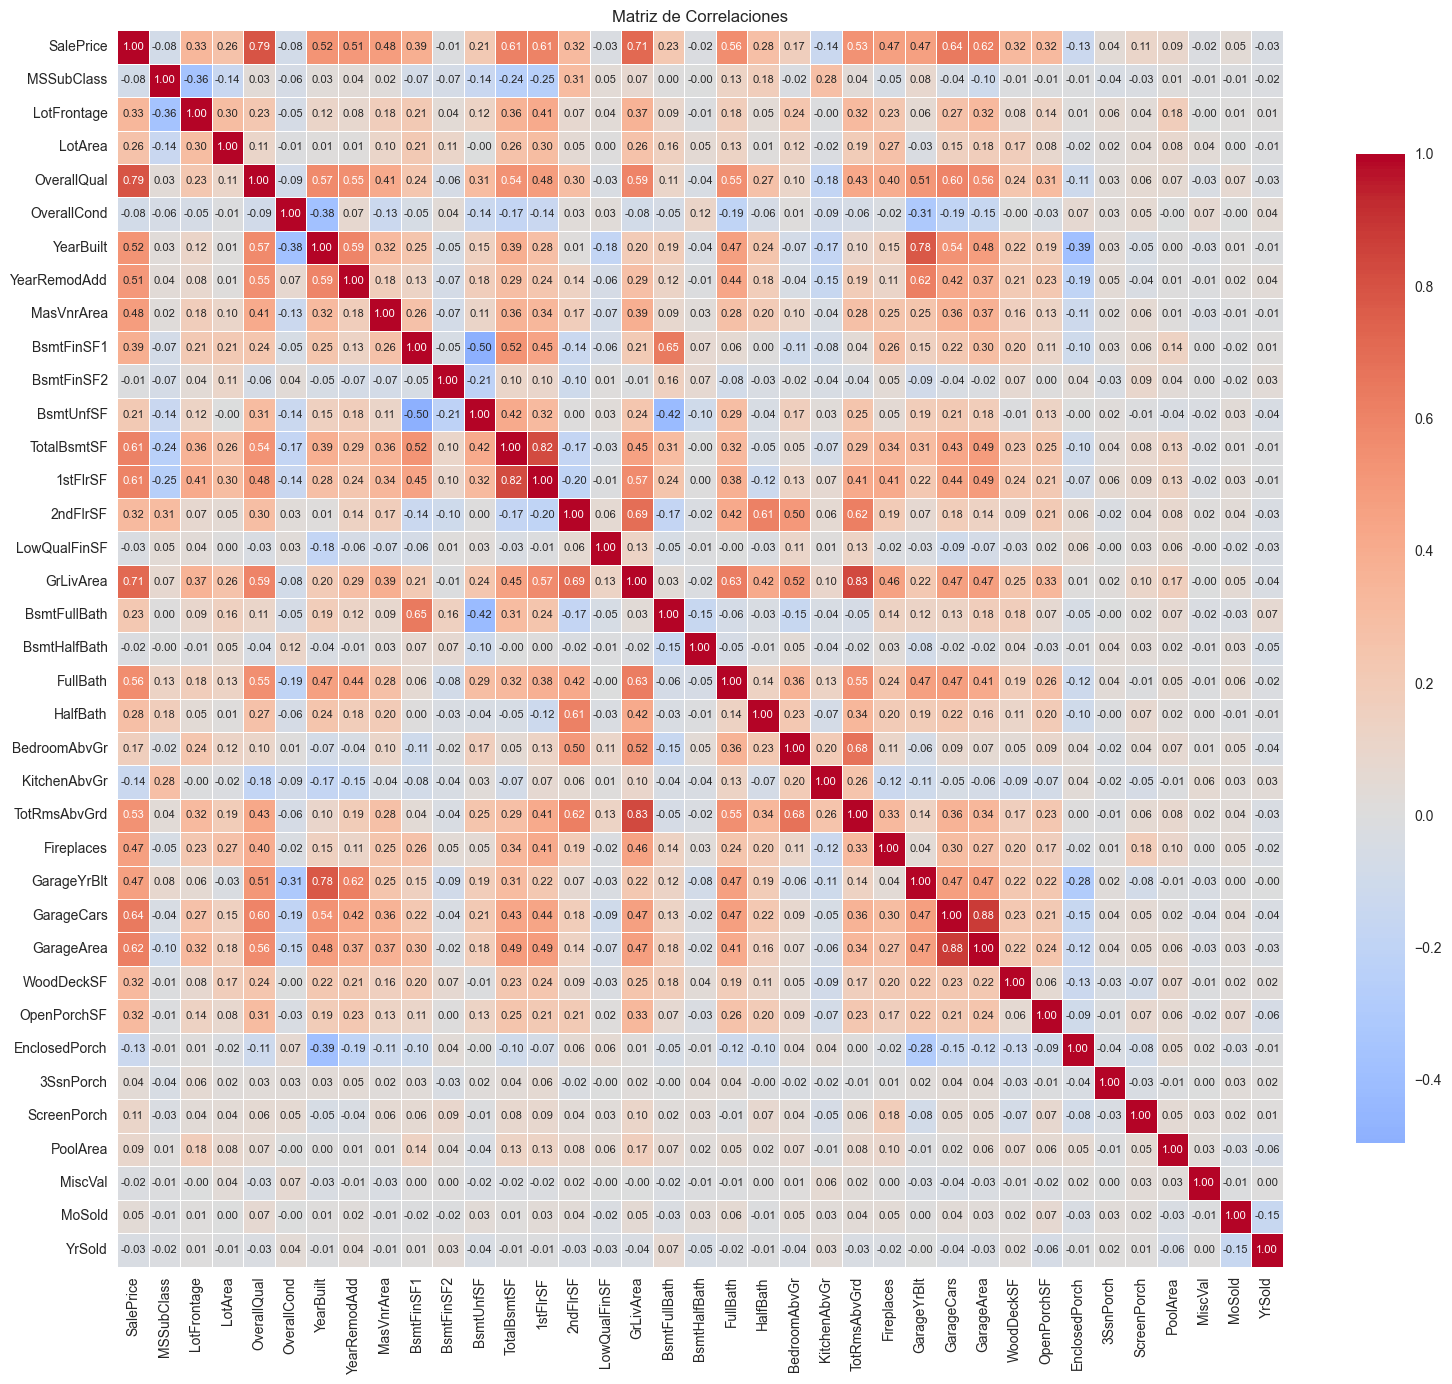

In [21]:

# Calcular matriz de correlaciones
corr_matrix = datost[columnas_numericas].corr()

plt.figure(figsize=(16, 14))

# Crear el heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'shrink': 0.8},  # Reducir el tamaño de la barra de color
            annot_kws={'size': 8},  # Reducir el tamaño de la fuente de los números
            linewidths=0.5)


plt.xticks(rotation=90)  # Rota las etiquetas del eje X
plt.yticks(rotation=0)   # Rota las etiquetas del eje Y (si es necesario)


plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datos_numericos)
X_scaled = pd.DataFrame(X_scaled, columns=datos_numericos.columns)

<p>Observando la matriz de correlacíon podemos ver que hay varias columnas que no tienen una buena correlación con la variable SalePrice, la cual es la que nos interesa evaluar para los futuros modelos, por lo tanto solamente trabajaremos con: </p>

SalePrice,OverallQual ,GrLivArea,GarageCars


<p> Se puede observar que las columnas que vamos a utilizar no tienen valores nulos, por lo tanto no hay que corregir el dataframe. </p>

In [65]:
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

numeric_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']

# Filtrando el DataFrame para obtener solo las columnas que te interesan
columns_to_select = categorical_columns + numeric_columns
datost = datost[columns_to_select]

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datost[numeric_columns] = scaler.fit_transform(datost[numeric_columns])

In [67]:
# Verificar que ambas tablas tienen la misma cantidad de filas
print("\nFilas en datos numéricos:", len(datos_numericos))
print("Filas en datos categóricos:", len(letras))

#columnas_usar = ["SalePrice","OverallQual" ,"GrLivArea","GarageCars"]


# Unir ambos datasets
datos_limpiados = datost.copy()
datos_limpiados2 = datos_limpiados.copy()
datos_limpiados3 = datos_limpiados.copy()

# Mostrar el resultado final
print("\nDatos combinados después de la limpieza:")
datos_limpiados.head()



Filas en datos numéricos: 1460
Filas en datos categóricos: 1460

Datos combinados después de la limpieza:


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,OverallQual,GrLivArea,GarageCars
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,0.347273,0.651479,0.370333,0.311725
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Y,Gd,MnPrv,Shed,WD,Normal,0.007288,-0.071836,-0.482512,0.311725
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,0.536154,0.651479,0.515013,0.311725
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Y,Gd,MnPrv,Shed,WD,Abnorml,-0.515281,0.651479,0.383659,1.650307
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,0.869843,1.374795,1.299326,1.650307


In [68]:
from sklearn.feature_selection import f_classif

# Aplica ANOVA a cada variable categórica
anova_scores = []
for col in categorical_columns:
    X_cat = datos_limpiados[col].astype('category').cat.codes.values.reshape(-1, 1)
    f_score, _ = f_classif(X_cat, datos_limpiados['SalePrice'])
    anova_scores.append(f_score[0])

for col, score in zip(categorical_columns, anova_scores):
    print(f"{col}: {score}")

MSZoning: 1.7427925033233271
Street: 1.8707163691968878
Alley: 1.0829665591311617
LotShape: 1.4040637070125206
LandContour: 1.0793229273003802
Utilities: 0.23979596482992555
LotConfig: 0.9605177757733244
LandSlope: 1.1951228349694856
Neighborhood: 1.2504812992396086
Condition1: 0.7777434917901039
Condition2: 1.53690833279312
BldgType: 1.023017198116637
HouseStyle: 1.0396859243806844
RoofStyle: 1.1735913279300674
RoofMatl: 1.0687849226292692
Exterior1st: 0.9812420008434056
Exterior2nd: 1.0138333008684413
MasVnrType: 1.9702413882048169
ExterQual: 3.7748828876663105
ExterCond: 0.869631122792361
Foundation: 1.4988459189847005
BsmtQual: 3.0119378419272
BsmtCond: 0.9979438597722142
BsmtExposure: 1.3802654589121763
BsmtFinType1: 0.9808357448129525
BsmtFinType2: 0.8564053810613717
Heating: 1.4797213891452388
HeatingQC: 1.2876555108870527
CentralAir: 1.5722758791235756
Electrical: 1.1286839937138475
KitchenQual: 2.9047453946078408
Functional: 0.8039921226528484
FireplaceQu: 1.1879001573578267
G

In [69]:
categoricas_utilziar= [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageFinish",
    "MasVnrType",
    "MSZoning",
    "Street",
    "Condition2",
    "CentralAir"
]

datos_limpiados = datos_limpiados[categoricas_utilziar + numeric_columns]

datos_limpiados.dtypes

ExterQual        object
BsmtQual         object
KitchenQual      object
GarageFinish     object
MasVnrType       object
MSZoning         object
Street           object
Condition2       object
CentralAir       object
SalePrice       float64
OverallQual     float64
GrLivArea       float64
GarageCars      float64
dtype: object

# Aqui empezaria lo nuevo #

In [70]:
y = datos_limpiados.pop("SalePrice")
X = datos_limpiados

In [71]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 12)
(438, 12)
(1021,)
(438,)


In [72]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_train_discretized = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_discretized = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

In [80]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(datos_limpiados)
categorical_columns = categorical_columns_selector(datos_limpiados)
print(categorical_columns)
print(numerical_columns)

['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'MasVnrType', 'MSZoning', 'Street', 'Condition2', 'CentralAir']
['OverallQual', 'GrLivArea', 'GarageCars']


In [81]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])
    

In [ ]:
# Crear pipeline con KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Definir hiperparámetros a optimizar en la búsqueda
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  
    'knn__weights': ['uniform', 'distance'], 
    'knn__p': [1, 2]  
}

# Validación cruzada con 5 folds y GridSearch
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['ExterQual',
                                                                          'BsmtQual',
                                                                          'KitchenQual',
                                                                          'GarageFinish',
                                                                          'MasVnrType',
                                                                          'MSZoning',
                                                                          'Street',
                                                                          'Condition2',
                                                                          'CentralAir']),
                                                                        ('standar-scaler',
                                                                         StandardScaler(),
                                                                         ['OverallQual',
                                                                          'GrLivArea',
                                                                          'GarageCars'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [83]:
# Mejor modelo encontrado
best_knn = grid_search.best_estimator_
print(f"Mejor hiperparámetro: {grid_search.best_params_}")


Mejor hiperparámetro: {'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}


In [84]:
# Evaluación en el conjunto de prueba
y_pred = best_knn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"MSE en test: {mse}")
print(f"RMSE en test: {rmse}")
print(f"R² en test: {r2}")

MSE en test: 0.21377610247724976
RMSE en test: 0.46235927856727366
R² en test: 0.8014078092971167


Muy buen resultado de prediccion, casi no tiene errores. 

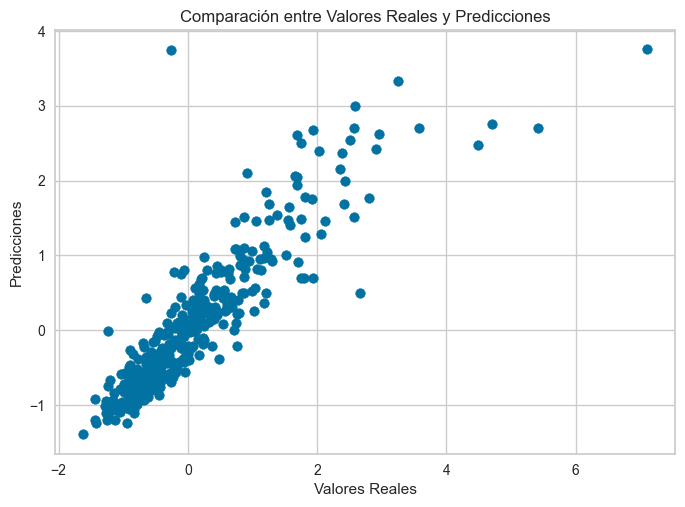

In [35]:
# Visualización de errores
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predicciones")
plt.show()

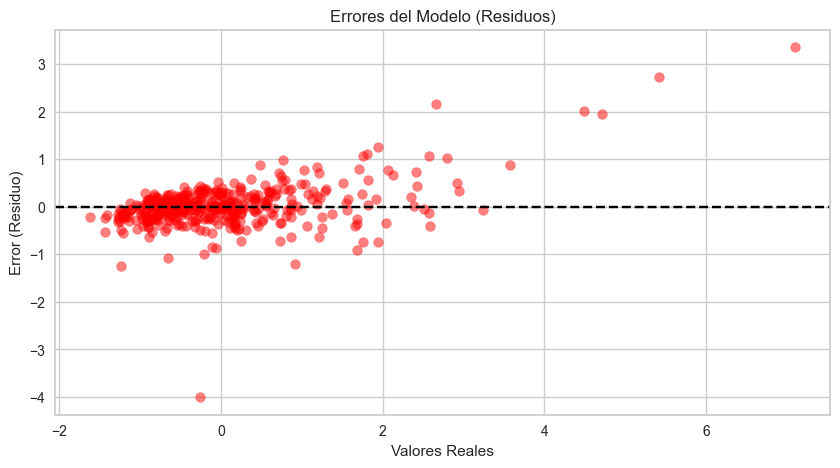

In [36]:
plt.figure(figsize=(10,5))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Error (Residuo)")
plt.title("Errores del Modelo (Residuos)")
plt.show()

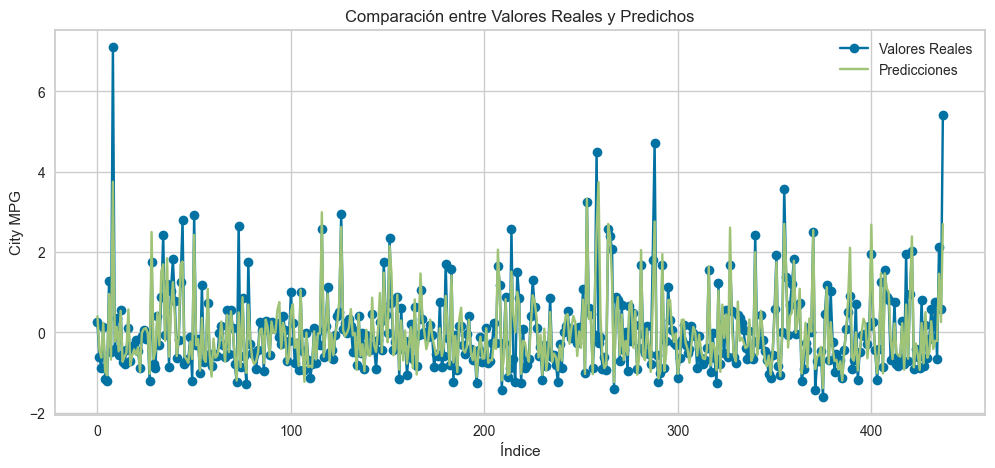

In [37]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test.values, label="Valores Reales", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicciones", marker='x')
plt.xlabel("Índice")
plt.ylabel("City MPG")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

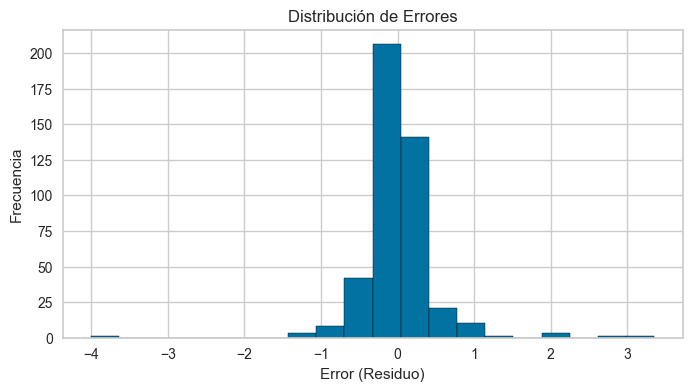

In [38]:
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()


este modelo de MKN Resulto tener una mejor predicciona a modelos anteriores realizados. Con un valor de RMSE en test: 0.46235927856727366
R² en test: 0.8014078092971167 superando a los otros modelos


# Creacion de la variable categorica PriceType #

In [86]:
# Calcular los percentiles 33 y 66
p33 = datos_limpiados2['SalePrice'].quantile(0.33)
p66 = datos_limpiados2['SalePrice'].quantile(0.66)

# Crear la nueva variable categórica
def categorizar_precio(precio):
    if precio <= p33:
        return 'Economicas'
    elif precio <= p66:
        return 'Intermedias'
    else:
        return 'Caras'

# Aplicar la función al dataframe
datos_limpiados2['PriceType'] = datos_limpiados2['SalePrice'].apply(categorizar_precio)

print(datos_limpiados2[['SalePrice', 'PriceType']])
print('Percentil 33: ', p33, 'Percentil 66: ', p66 )

      SalePrice    PriceType
0      0.347273        Caras
1      0.007288  Intermedias
2      0.536154        Caras
3     -0.515281  Intermedias
4      0.869843        Caras
...         ...          ...
1455  -0.074560  Intermedias
1456   0.366161        Caras
1457   1.077611        Caras
1458  -0.488523  Intermedias
1459  -0.420841  Intermedias

[1460 rows x 2 columns]
Percentil 33:  -0.5278730946497413 Percentil 66:  0.11297325611370197


In [87]:
datos_limpiados2.groupby('PriceType').size()

PriceType
Caras          497
Economicas     483
Intermedias    480
dtype: int64

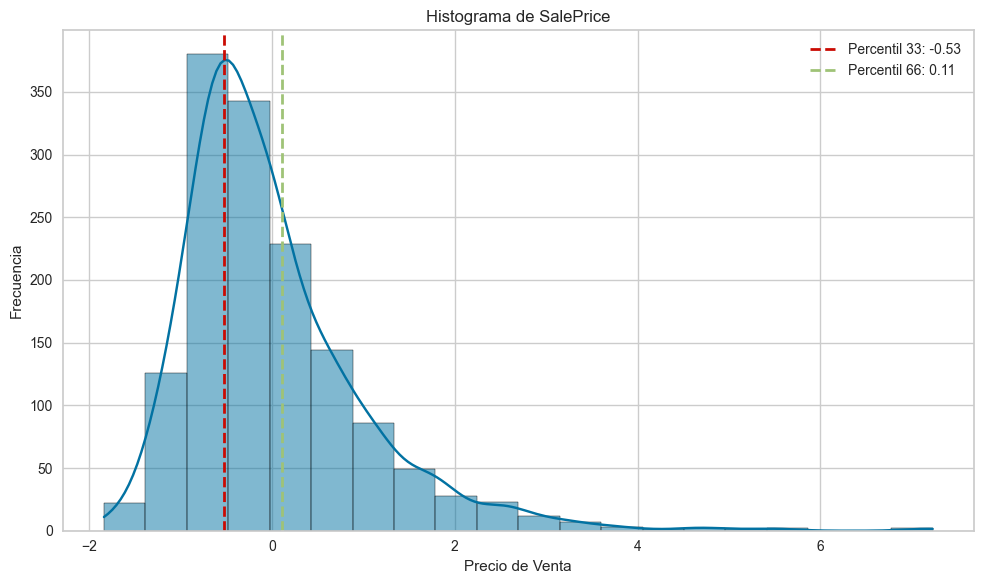

In [88]:
from matplotlib.pyplot import axes

y_column = 'SalePrice'

# Crear los subgráficos (si es necesario)
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Aquí puedes ajustar la cantidad de subgráficos

# Crear el histograma con Seaborn
sns.histplot(datos_limpiados2[y_column], bins=20, kde=True, ax=axes)

# Agregar las líneas verticales en los percentiles
axes.axvline(p33, color='r', linestyle='dashed', linewidth=2, label=f'Percentil 33: {p33:.2f}')
axes.axvline(p66, color='g', linestyle='dashed', linewidth=2, label=f'Percentil 66: {p66:.2f}')

# Título y etiquetas
axes.set_title(f'Histograma de {y_column}')
axes.set_xlabel('Precio de Venta')
axes.set_ylabel('Frecuencia')

# Mostrar la leyenda
axes.legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Para generar la nueva variable categorica se utilizaron los percentiles sobrela variable SalePrice para asegurar que los precios de venta estuviera distribuidos de manera uniforme entre las 3 categorias que esta nueva variable tiene 

In [89]:
y = datos_limpiados2.pop("PriceType") #La variable respuesta
pventa = datos_limpiados2.pop('SalePrice') #Remover saleprice para entrenar el modelo
X = datos_limpiados2 #El resto de los datos

In [90]:
X_train, X_test, y_train, y_test = load('train_test_data.joblib')
# Normalización de los datos 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo categorico #

In [91]:
# Probar diferentes valores de K
accuracies = []
cv_scores = []
k_values = range(1, 50)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

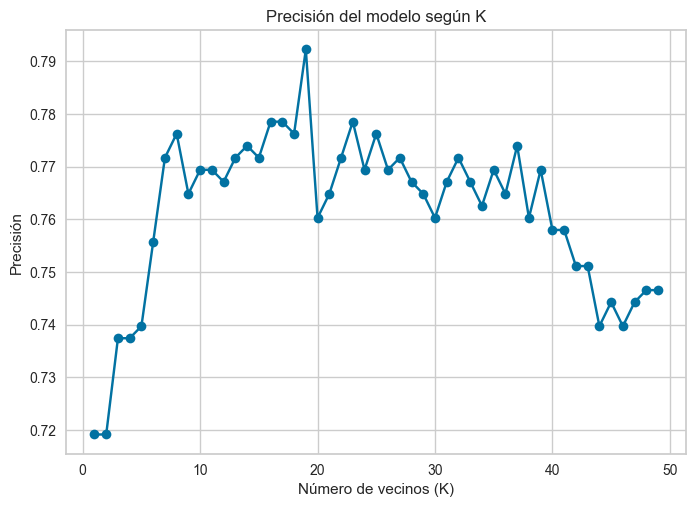

In [92]:
# Graficar la precisión vs. K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo según K')
plt.show()

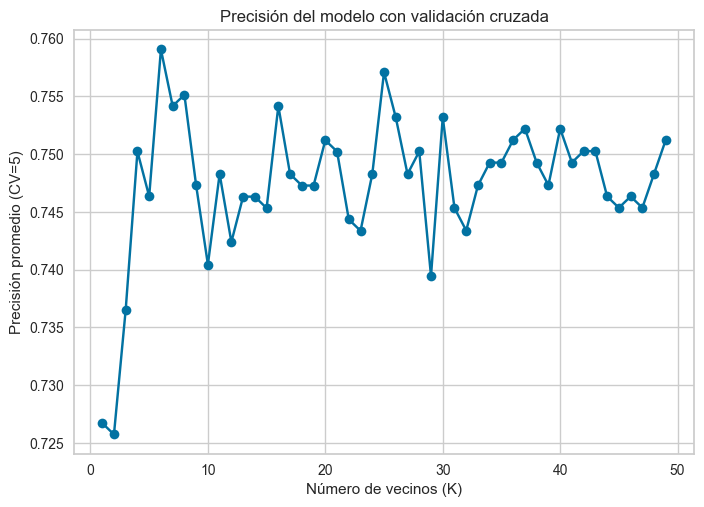

Mejor valor de K según CV=5: 6


In [94]:
# Graficamos los resultados
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión promedio (CV=5)')
plt.title('Precisión del modelo con validación cruzada')
plt.show()

# Mejor K basado en la validación cruzada
best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor valor de K según CV=5: {best_k}")

In [95]:
knn = KNeighborsClassifier(n_neighbors=6, p=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6, p=3)

In [96]:
# Predicción en el conjunto de prueba
y_pred = knn.predict(X_test)

In [97]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Matriz de Confusión:
[[125   4  14]
 [  2 137  11]
 [ 40  36  69]]
Reporte de Clasificación:
              precision    recall  f1-score   support

       Caras       0.75      0.87      0.81       143
  Economicas       0.77      0.91      0.84       150
 Intermedias       0.73      0.48      0.58       145

    accuracy                           0.76       438
   macro avg       0.75      0.75      0.74       438
weighted avg       0.75      0.76      0.74       438

Precisión del modelo: 0.76


El algoritmo predice bastante bien tanto la categoria Caras como Economicas mientras que para intermedias este comete un numero similar de errores clasificandolas como una de las otras 2 categorias.

# Cambio de valores de de hiperparametros para los dos modelos #

Modelo de regresion


In [79]:
# Preprocesamiento
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor, numerical_columns)
])

# Crear pipeline con KNN (usando hiperparámetros predeterminados)
knn_pipeline_base = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())  # Hiperparámetros predeterminados
])

# Entrenar el modelo base
knn_pipeline_base.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_base = knn_pipeline_base.predict(X_test)

# Calcular métricas
mse_base = mean_squared_error(y_test, y_pred_base)  # MSE
rmse_base = mse_base ** 0.5  # RMSE (raíz cuadrada del MSE)
r2_base = r2_score(y_test, y_pred_base)  # R²

print("Resultados del modelo base (sin tuneo):")
print(f"MSE en test: {mse_base}")
print(f"RMSE en test: {rmse_base}")
print(f"R² en test: {r2_base}")

Resultados del modelo base (sin tuneo):
MSE en test: 0.20774437159675638
RMSE en test: 0.45578983270445644
R² en test: 0.8070111233972739


¿Qué parámetros pueden tunearse en un KNN?

Los principales parámetros son n_neighbors, weights y p.

¿Mejoraron los resultados usando el mejor modelo tuneado?

No, los resultados no mejoraron. El modelo sin tuneo tuvo un rendimiento ligeramente mejor (MSE más bajo y R² más alto) que el modelo tuneado.

Explicación de los resultados:

Es posible que los hiperparámetros predeterminados ya fueran adecuados para este conjunto de datos, o que el tuneo no encontrara una combinación que mejorara el rendimiento. Además, KNN tiene limitaciones inherentes que pueden afectar su rendimiento incluso después del tuneo.

Moldelo de clasificacion

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': range(1, 50),  # Prueba valores de k de 1 a 50
    'weights': ['uniform', 'distance'],  # Prueba ambos tipos de ponderación
    'p': [1, 2],  # Prueba distancia Manhattan (p=1) y Euclidiana (p=2)
    'metric': ['euclidean', 'manhattan']  # Prueba diferentes métricas
}

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Búsqueda de hiperparámetros con validación cruzada (CV=5)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el modelo con los mejores hiperparámetros
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = best_knn.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
 

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
Matriz de Confusión:
[[127   5  11]
 [  1 139  10]
 [ 24  36  85]]
Reporte de Clasificación:
              precision    recall  f1-score   support

       Caras       0.84      0.89      0.86       143
  Economicas       0.77      0.93      0.84       150
 Intermedias       0.80      0.59      0.68       145

    accuracy                           0.80       438
   macro avg       0.80      0.80      0.79       438
weighted avg       0.80      0.80      0.79       438

Precisión del modelo: 0.80


Los principales parámetros que pueden tunearse en un KNN son n_neighbors, weights, p y metric. Después del tuneo, los resultados mejoraron significativamente: la precisión global aumentó del 76% al 80%, las métricas por clase (precisión, recall y F1-score) mejoraron en todas las categorías, y la matriz de confusión mostró menos errores de clasificación. Esto indica que el ajuste de hiperparámetros optimizó el modelo, permitiéndole generalizar mejor y reducir errores. 

El Random Forest es el mejor modelo para predecir en términos de precisión, alcanzando un 0.9452 después del tuneo, lo que supera al KNN (0.80) y al Naive Bayes (RMSE = 0.9058)